In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
from itertools import combinations
import random

Ressources:

- [Plot labels on graph edges](https://compucademy.net/graphs-in-python-for-a-level-computer-science/)
- [Create random graph](https://compucademy.net/generating-random-graphs-in-python/)

In [2]:
def create_random_graph(n, p, is_weighted=False):
    """
        Generating a random undirected weighted/unweighted graph.
    """
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random.random()
        if a < p:
            if is_weighted:
                w = random.randint(1, 100)
                E.add((*combination, w))
            else:
                E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    
    if is_weighted:
        g.add_weighted_edges_from(E)
    else:
        g.add_edges_from(E)
        
    return g

n = 5
p = 0.5

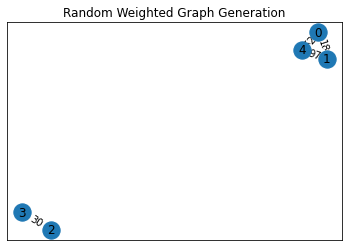

In [3]:
G_weighted = create_random_graph(n, p, is_weighted=True)
weights = nx.get_edge_attributes(G_weighted, "weight")
pos = nx.spring_layout(G_weighted)

nx.draw_networkx(G_weighted, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=weights)

plt.title("Random Weighted Graph Generation")
plt.show()

Text(0.5, 1.0, 'Random unweighted Graph Generation')

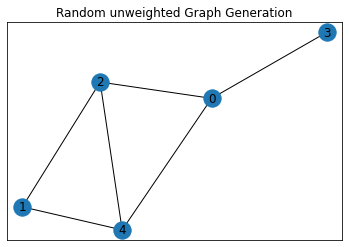

In [4]:
G_unweighted = create_random_graph(n, p, is_weighted=False)
pos = nx.spring_layout(G_unweighted)
nx.draw_networkx(G_unweighted, pos)
plt.title("Random unweighted Graph Generation")

In [5]:
class RegGraph:
    """
        Build regular graph representation from Osmnx graph.
    """
    
    def __init__(self, G, is_weighted=False):
        self.G = G
        self.is_weighted = is_weighted
        self.adjlist = self.create_adjlist(self.G)
        self.adjmat = self.adjlist_to_adjmat(self.adjlist)
        
    def create_adjlist(self, G):
        adjlist = []
        for src, nbrdict in self.G.adjacency():
            tmp = []
            for dst, w in nbrdict.items():
                if self.is_weighted:
                    tmp.append((dst, w['weight']))
                else:
                    tmp.append(dst)
            adjlist.append((src, tmp))
        return dict(adjlist)

    def adjlist_to_adjmat(self, adjlist):
        n = len(self.adjlist)
        adjmat = [[0 for j in range(n)] for i in range(n)]
        for src in range(n):
            if self.is_weighted:
                for dst, weight in self.adjlist[src]:
                    adjmat[src][dst] = weight
            else:
                for dst in self.adjlist[src]:
                    adjmat[src][dst] = 1
        return adjmat

    def pretty_print_adjmat(self):
        n = len(self.adjmat)

        print("  ",end="")
        for i in range(n):
            print("{} ".format(i), end="")

        print()

        for i in range(n):
            print("{} ".format(i), end="")
            for j in range(n):
                print(self.adjmat[i][j], end="|")
            print()

In [6]:
graph_weighted = RegGraph(G_weighted, is_weighted=True)
print(graph_weighted.adjlist)
print("----")
graph_weighted.pretty_print_adjmat()

{0: [(1, 18), (4, 52)], 1: [(0, 18), (4, 97)], 2: [(3, 30)], 3: [(2, 30)], 4: [(1, 97), (0, 52)]}
----
  0 1 2 3 4 
0 0|18|0|0|52|
1 18|0|0|0|97|
2 0|0|0|30|0|
3 0|0|30|0|0|
4 52|97|0|0|0|


In [7]:
graph_unweighted = RegGraph(G_unweighted, is_weighted=False)
print(graph_unweighted.adjlist)
print("----")
graph_unweighted.pretty_print_adjmat()

{0: [4, 3, 2], 1: [2, 4], 2: [1, 4, 0], 3: [0], 4: [1, 2, 0]}
----
  0 1 2 3 4 
0 0|0|1|1|1|
1 0|0|1|0|1|
2 1|1|0|0|1|
3 1|0|0|0|0|
4 1|1|1|0|0|


## Djisktra

In [9]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path

In [10]:
graph_unweighted.adjmat

[[0, 0, 1, 1, 1],
 [0, 0, 1, 0, 1],
 [1, 1, 0, 0, 1],
 [1, 0, 0, 0, 0],
 [1, 1, 1, 0, 0]]

In [14]:
graph = csr_matrix(graph_unweighted.adjmat)
print(graph)

  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 2)	1
  (1, 4)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (3, 0)	1
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1


In [15]:
dist_matrix, predecessors = shortest_path(csgraph=graph, directed=False, indices=0, return_predecessors=True)

In [16]:
dist_matrix

array([0., 2., 1., 1., 1.])

In [17]:
predecessors

array([-9999,     2,     0,     0,     0], dtype=int32)